In [32]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import os
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
from torchvision.models.optical_flow import Raft_Large_Weights
from torchvision.models.optical_flow import raft_large

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

# If you can, run this example on a GPU, it will be a lot faster.
device = "cuda" if torch.cuda.is_available() else "cpu"

model = raft_large(weights=Raft_Large_Weights.DEFAULT, progress=False).to(device)
model = model.eval()

In [72]:
[i for i in ['a', 'b', 'bc'] if i[0]=='b']

['b', 'bc']

In [2]:
os.chdir('../')

In [3]:
image_path = 'data/wlasl/rawframes/test_flow/00625/'

In [5]:
n_frames = len(os.listdir(image_path))
n_frames

35

In [24]:
def load_images(video_path, start_frame, end_frame):
    image1_path = os.path.join(video_path, f'img_{start_frame:05d}.jpg')
    image2_path = os.path.join(video_path, f'img_{end_frame:05d}.jpg')

    img1 = cv2.cvtColor(cv2.imread(image1_path), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(image2_path), cv2.COLOR_BGR2RGB)

    img1_batch = torch.tensor(img1).unsqueeze(dim=0).permute(0,3,1,2)
    img2_batch = torch.tensor(img2).unsqueeze(dim=0).permute(0,3,1,2)
                               
    return img1_batch, img2_batch

In [29]:
def preprocess(img1_batch, img2_batch):
    img1_batch = F.resize(img1_batch, size=[256, 256])
    img2_batch = F.resize(img2_batch, size=[256, 256])
    return transforms(img1_batch, img2_batch)

In [42]:
def get_flow(img1_batch, img2_batch):
    with torch.inference_mode():
        return model(img1_batch.to(device), img2_batch.to(device))[-1]

In [69]:
start_frame = 1
end_frame = 4
img1, img2 = load_images(image_path, 1, 4)

In [70]:
img1.shape

torch.Size([1, 3, 256, 256])

In [45]:
img1, img2 = preprocess(img1, img2)

In [44]:
img1.shape

torch.Size([1, 3, 256, 256])

In [46]:
flow = get_flow(img1, img2)

In [36]:
flow.shape

torch.Size([1, 2, 256, 256])

In [47]:
from torchvision.utils import flow_to_image

flowimg = flow_to_image(flow)

In [48]:
flowimg.shape

torch.Size([1, 3, 256, 256])

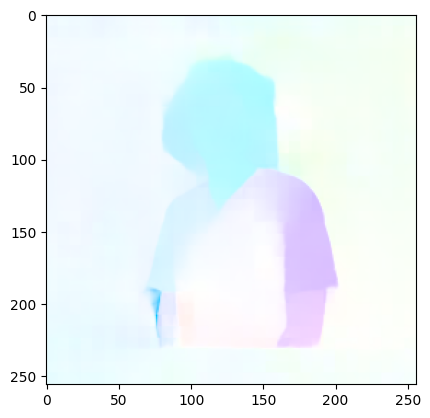

In [49]:
plt.imshow(flowimg[0].permute(1,2,0).cpu())

In [51]:
video_path

'data/wlasl/rawframes/test_flow/00625/'

In [52]:
os.path.join(video_path, f'depth_{1:05d}.jpg')

'data/wlasl/rawframes/test_flow/00625/depth_00001.jpg'

In [77]:
x = 'depth_'
x[:5]

'depth'

In [59]:
flowimg.squeeze().permute(1,2,0).cpu().numpy().shape

(256, 256, 3)

In [60]:
cv2.imwrite(os.path.join(video_path, f'flow_{1:05d}.jpg'), flowimg.squeeze().permute(1,2,0).cpu().numpy())

True

In [61]:
def write_img(flow_img, frame_number, out_path):
    cv2.imwrite(os.path.join(out_path, f'flow_{frame_number:05d}.jpg'), flow_img.squeeze().permute(1,2,0).cpu().numpy())

In [63]:
start_frame = 1
end_frame = 4
frame_number = 1

while end_frame <= n_frames:
    img1, img2 = load_images(video_path, start_frame, end_frame)
    img1, img2 = preprocess(img1, img2)
    flow = get_flow(img1, img2)
    flow_img = flow_to_image(flow)
    write_img(flow_img, frame_number, video_path)
    
    frame_number += 1
    start_frame = end_frame
    end_frame += 4

In [65]:
def process_video(video_path):
    start_frame = 1
    end_frame = 4
    frame_number = 1
    n_frames = len(os.listdir(video_path))
    
    while end_frame <= n_frames:
        img1, img2 = load_images(video_path, start_frame, end_frame)
        img1, img2 = preprocess(img1, img2)
        flow = get_flow(img1, img2)
        flow_img = flow_to_image(flow)
        write_img(flow_img, frame_number, video_path)

        frame_number += 1
        start_frame = end_frame
        end_frame += 4

In [66]:
def process_subset(subset_path):
    for video in os.listdir(subset_path):
        video_path = os.path.join(subset_path, video)
        process_video(video_path)
        print(video_path)

In [67]:
subset_path = 'data/wlasl/rawframes/test_flow/'

In [68]:
process_subset(subset_path)

data/wlasl/rawframes/test_flow/00625
data/wlasl/rawframes/test_flow/01991
